In [10]:
# IMPORTS
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# CREATE EMPTY LIST TO ADD POSTS AND DATES TO
final_list = []

# SCRAPER BEGINS HERE
    # bitcointalk subforums end in this format, with the number before the decimal
    # represents the forum id, and the number after it represents a page
    # x.40 is page 2 on forum x, x.80 is page 3, x.120 is page 4, etc.

url_end = '9.40'

while url_end != '9.16000': #set this to whatever number the LAST page you want to scrape is
    url = 'https://bitcointalk.org/index.php?board={}'.format(url_end)
    page = requests.get(url)
    page_content = BeautifulSoup(page.content,'html.parser')
    
    # GET POST TITLES
    all_td = page_content.find_all('td', {'class': 'windowbg'})
    cleanlist = []
    for row in all_td[::3]:  # select only every third row because some empty rows have this class
        text = row.getText()
        text = text.replace('\n', '')
        text = text.replace('«', '')
        text = text.replace('»', '')
        text = text.replace(' \xa0All ', '')
        text = text.replace(' 1 2', '')
        text = text.replace(' ... ', '')
        cleanlist.append(text)

    #GET POST DATES
    all_date = page_content.find_all('td', {'class': 'windowbg2 lastpostcol'})
    cleanlist2 = []
    for row in all_date:
        text = row.getText()
        text = text.replace('\n', '')
        text = text.replace('\t', '')
        text = text.split('by', 1)
        realtext = text[0]
        cleanlist2.append(realtext)

    # CREATE FUNCTION TO MERGE LISTS
    def merge(list1, list2): 
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
        return merged_list 
    merged = merge(cleanlist, cleanlist2)
    for row in merged:
        final_list.append(row)
    
    #SET TO NEXT URL TO SCRAPE
    url_end = url_end.split('.', 1)
    url_end0 = url_end[0]
    url_end1 = url_end[1]
    url_end1 = int(url_end1)
    url_end1 += 40
    url_end = url_end0 + "." + str(url_end1)
    
    #PRINT FEEDBACK AND PAUSE FOR SERVER RULES
    print("Processing, page scraped, new URL: " + url_end)
    time.sleep(1)

Processing, page scraped, new URL: 9.80
Processing, page scraped, new URL: 9.120
Processing, page scraped, new URL: 9.160
Processing, page scraped, new URL: 9.200
Processing, page scraped, new URL: 9.240
Processing, page scraped, new URL: 9.280
Processing, page scraped, new URL: 9.320
Processing, page scraped, new URL: 9.360
Processing, page scraped, new URL: 9.400
Processing, page scraped, new URL: 9.440
Processing, page scraped, new URL: 9.480
Processing, page scraped, new URL: 9.520
Processing, page scraped, new URL: 9.560
Processing, page scraped, new URL: 9.600
Processing, page scraped, new URL: 9.640
Processing, page scraped, new URL: 9.680
Processing, page scraped, new URL: 9.720
Processing, page scraped, new URL: 9.760
Processing, page scraped, new URL: 9.800
Processing, page scraped, new URL: 9.840
Processing, page scraped, new URL: 9.880
Processing, page scraped, new URL: 9.920
Processing, page scraped, new URL: 9.960
Processing, page scraped, new URL: 9.1000
Processing, page

Processing, page scraped, new URL: 9.7920
Processing, page scraped, new URL: 9.7960
Processing, page scraped, new URL: 9.8000
Processing, page scraped, new URL: 9.8040
Processing, page scraped, new URL: 9.8080
Processing, page scraped, new URL: 9.8120
Processing, page scraped, new URL: 9.8160
Processing, page scraped, new URL: 9.8200
Processing, page scraped, new URL: 9.8240
Processing, page scraped, new URL: 9.8280
Processing, page scraped, new URL: 9.8320
Processing, page scraped, new URL: 9.8360
Processing, page scraped, new URL: 9.8400
Processing, page scraped, new URL: 9.8440
Processing, page scraped, new URL: 9.8480
Processing, page scraped, new URL: 9.8520
Processing, page scraped, new URL: 9.8560
Processing, page scraped, new URL: 9.8600
Processing, page scraped, new URL: 9.8640
Processing, page scraped, new URL: 9.8680
Processing, page scraped, new URL: 9.8720
Processing, page scraped, new URL: 9.8760
Processing, page scraped, new URL: 9.8800
Processing, page scraped, new URL:

Processing, page scraped, new URL: 9.15600
Processing, page scraped, new URL: 9.15640
Processing, page scraped, new URL: 9.15680
Processing, page scraped, new URL: 9.15720
Processing, page scraped, new URL: 9.15760
Processing, page scraped, new URL: 9.15800
Processing, page scraped, new URL: 9.15840
Processing, page scraped, new URL: 9.15880
Processing, page scraped, new URL: 9.15920
Processing, page scraped, new URL: 9.15960
Processing, page scraped, new URL: 9.16000


In [11]:
len(final_list)

15960

In [35]:
import datetime
df = pd.DataFrame(final_list,columns=['title', 'date'])
df = df.drop_duplicates() #drop duplicate rows in case there are any
df['title'] = df['title'].str.lower()   #set all titles to lower case
df['date'] = pd.to_datetime(df['date'])   #format date column as dt
df

,title,date
0,sex with mask won't save you.,2021-02-23 10:08:59
1,covid-19: let us help each and everyone.,2021-02-23 09:22:18
2,terraformation,2021-02-23 09:03:32
3,what makes you think that you are really cool?,2021-02-23 08:36:19
4,this the truth about life and people wealth an...,2021-02-23 08:35:35
...,...,...
15955,tell congress: end warrantless email snooping!,2015-11-04 05:37:07
15956,how old are you? 3 4,2015-11-04 00:18:02
15957,mullvad help,2015-11-03 17:29:47
15958,do you spend you`re bitcoin on girls ?,2015-11-03 16:41:42


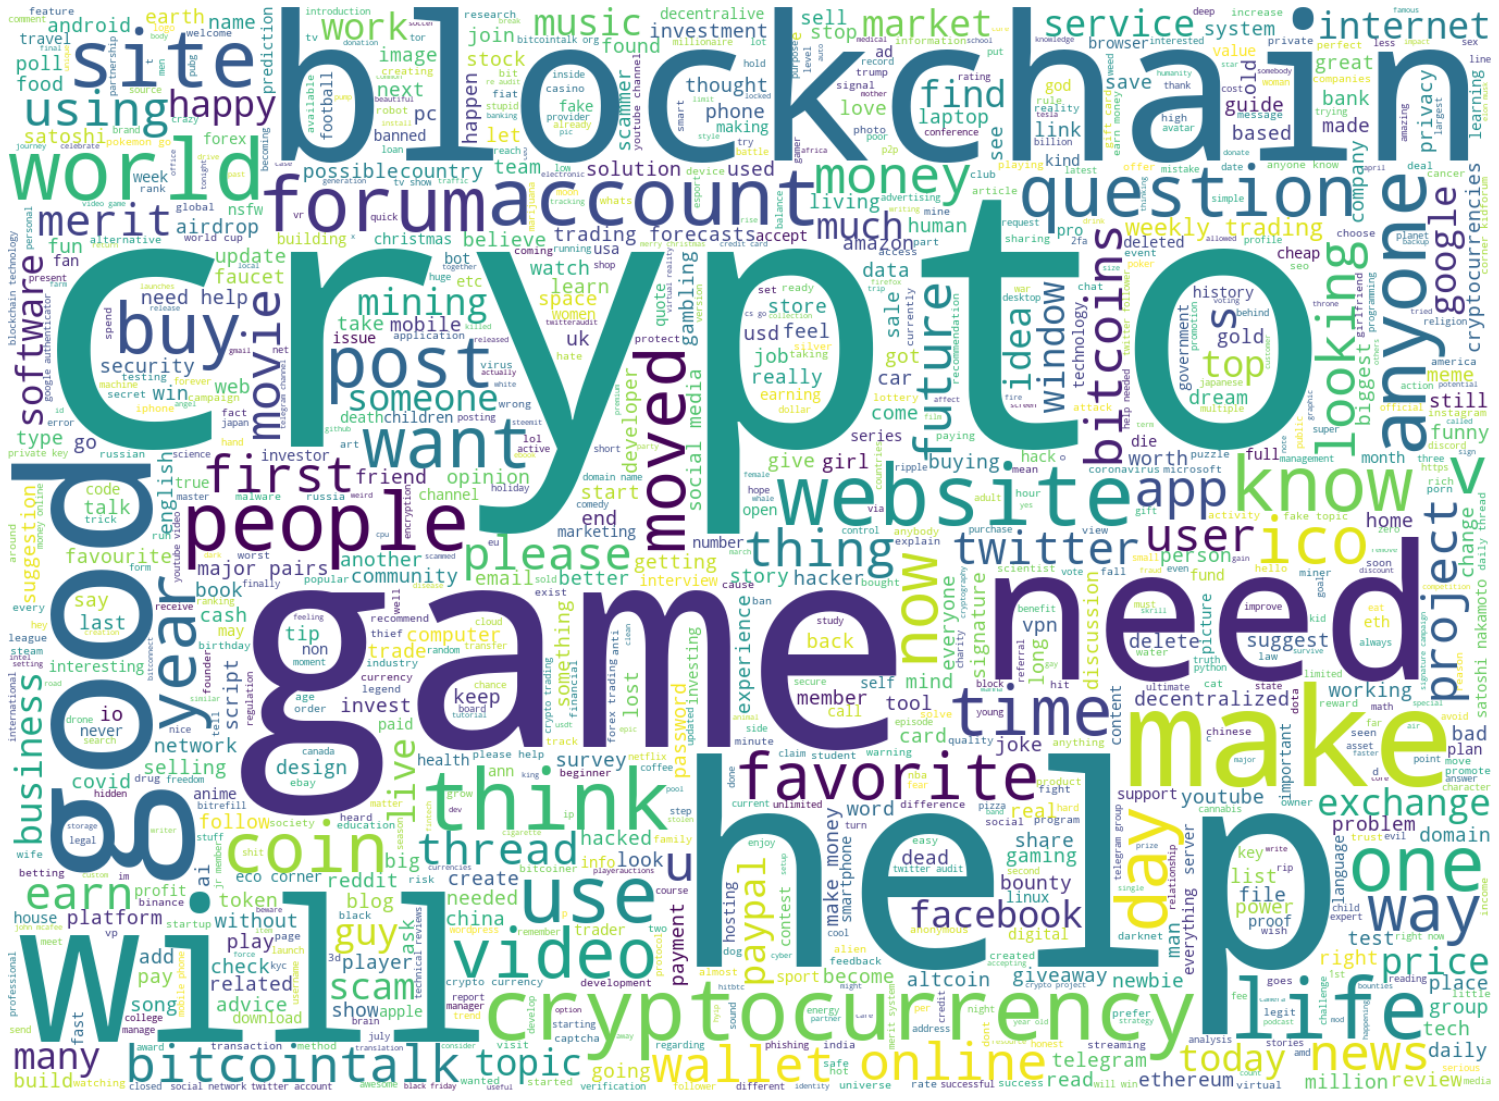

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["bitcoin", "btc", 'new', 'best', 'free'])
wordcloud = WordCloud(max_words=1000,
                      width=1366, height=1000, 
                      stopwords=stopwords,
                      background_color="white").generate(' '.join(df['title']))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
# get a raw count of word frequency
df.title.str.split(expand=True).stack().value_counts().to_csv('bitcointalk_other_word_freq.csv')